In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [ ]:
file_path = ("/content/ELC.csv" )
data = pd.read_csv(file_path, delimiter=',')

In [ ]:
# Xem data
data


,Date,Price
0,12/15/2016,20446.0
1,12/16/2016,20298.3
2,12/19/2016,20298.3
3,12/20/2016,20076.9
4,12/21/2016,19855.5
...,...,...
1744,12/11/2023,19350.0
1745,12/12/2023,19350.0
1746,12/13/2023,18900.0
1747,12/14/2023,19150.0


In [ ]:
!pip install pmdarima

In [ ]:
prices = data['Price']

## **TRAIN - TEST: 8 : 2**

---



In [ ]:
#1. split data into train, test sets with a ratio of 8:2
train_size = int(0.8 * len(data))
test_size =len(data) - train_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]

In [ ]:
#2. Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=20117.378, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=20202.596, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=20138.718, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=20125.715, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=20200.885, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=20124.207, Time=0.71 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=20121.675, Time=0.32 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=20103.110, Time=1.31 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=20123.309, Time=0.20 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=20103.461, Time=2.08 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=20104.109, Time=2.06 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=20101.687, Time=1.58 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=20124.830, Time=0.53 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=20103.648, Time=2.39 sec
 ARIMA(1,1,4)(0,0,0

ARIMA(order=(2, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
# 3. Testing proccess
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))

In [ ]:
# 4. The process of creating index predicts the next 30 days
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[13807.15363652 13800.77641525 13766.20497051 13761.71397466
 13792.26649023 13805.57983855 13781.38347798 13761.83701379
 13778.2976502  13801.27401388 13792.98078672 13769.29071047
 13769.83337162 13791.85593697 13797.96455864 13779.47683255
 13768.29169474 13781.99414402 13796.42742486 13788.11535045
 13772.30263405 13775.22681901 13790.69539188 13792.6395269
 13778.94957544 13773.04705803 13783.90783078 13792.61380722
 13785.20498839 13774.94814879]


In [ ]:
# 5. Evaluate the accuracy of testing
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
test_rmse = np.sqrt(MSE(y_test, y_pred))
test_mape = MAPE(y_test, y_pred)*100
test_mae = MAE(y_test, y_pred)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Testing RMSE: 5477.970865621236
Testing MAPE: 25.49915953313261
Testing MAE: 3948.5442213419797


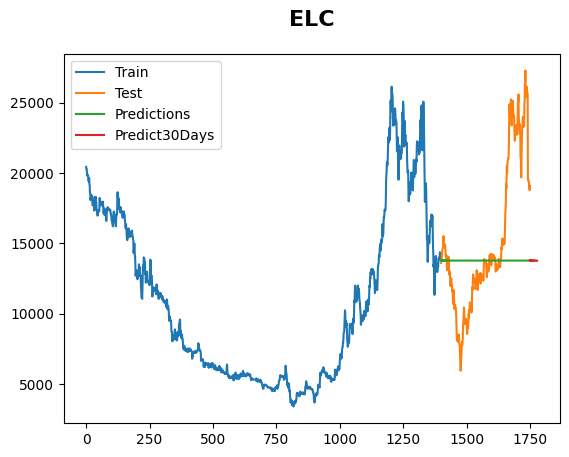

In [ ]:
# 6.Draw
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Predict30Days'])
plt.title('ELC', fontweight='bold', fontsize=16, pad=20)
plt.show()

## **TRAIN - TEST: 7 : 3**

---



In [ ]:
#1. split data into train, test sets with a ratio of 7:3
train_size = int(0.7 * len(data))
test_size =len(data) - train_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]

In [ ]:
# 2. Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=1.58 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=17595.079, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=17395.838, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.28 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=17275.311, Time=0.09 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=17136.914, Time=0.14 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=17061.508, Time=0.28 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=17062.641, Time=0.27 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=2.04 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=1.29 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=2.22 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=17063.506, Time=0.67 sec

Best model:  ARIMA(4,2,0)(0,0,0)[0]          
Total fit time: 9.015 seconds


ARIMA(order=(4, 2, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
# 3. Testing proccess
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))

In [ ]:
# 4. The process of creating index predicts the next 30 days
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[23323.62729068 23166.09878316 23119.43430663 23008.13196803
 22858.12565664 22694.68086372 22567.47866363 22457.42189779
 22329.77335164 22190.05570658 22052.13733349 21924.38967941
 21798.58243564 21667.45858218 21533.56178126 21401.34373023
 21271.68236783 21141.87208651 21010.51642197 20878.68845089
 20747.55556924 20616.99745662 20486.22988913 20355.04809923
 20223.83372376 20092.84853058 19961.97305918 19831.00169802
 19699.92982538 19568.87634179]


In [ ]:
# 5. Evaluate the accuracy of testing
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
test_rmse = np.sqrt(MSE(y_test, y_pred))
test_mape = MAPE(y_test, y_pred)* 100
test_mae = MAE(y_test, y_pred)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Testing RMSE: 34285.67271534129
Testing MAPE: 17.51089404404219
Testing MAE: 27492.33550264711


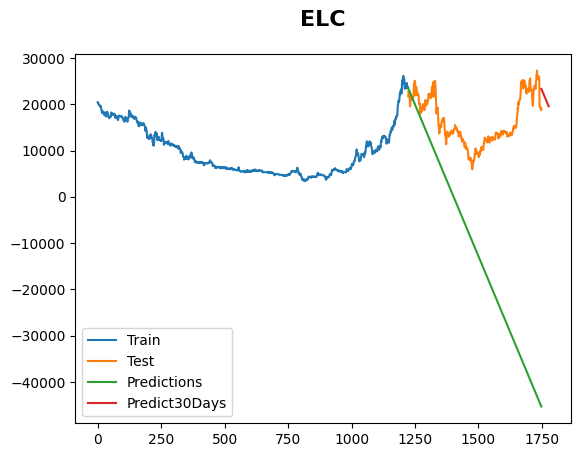

In [ ]:
# 6.Draw
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Predict30Days'])
plt.title('ELC', fontweight='bold', fontsize=16, pad=20)
plt.show()

## **TRAIN - TEST: 9 : 1**

---



In [ ]:
#1. split data into train, test sets with a ratio of 9:1
train_size = int(0.9 * len(data))
test_size =len(data) - train_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]

In [ ]:
# 2. Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=22662.986, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=22755.802, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=22684.876, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=22669.634, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=22754.057, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=22667.095, Time=0.41 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=22664.798, Time=0.32 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=22647.130, Time=1.52 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=22666.622, Time=0.24 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=22646.585, Time=2.10 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=22667.193, Time=2.30 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=22649.543, Time=3.87 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=22644.598, Time=2.49 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=22646.145, Time=2.77 sec
 ARIMA(5,1,3)(0,0,0

ARIMA(order=(4, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
# 3. Testing proccess
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))

In [ ]:
# 4. The process of creating index predicts the next 30 days
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[13735.51591168 13719.72582186 13735.27449149 13748.99745703
 13742.50426427 13725.32538797 13728.29980988 13743.42226774
 13746.13068191 13732.30629002 13726.39388328 13736.9250902
 13745.67576975 13738.35296329 13728.38769214 13732.09275172
 13742.36478122 13741.88292571 13732.38956132 13730.05441892
 13738.0888639  13742.53046577 13736.47553935 13730.6526574
 13734.51621846 13740.95570366 13739.28540697 13732.90833617
 13732.59529246 13738.33814062]


In [ ]:
# 5. Evaluate the accuracy of testing
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
test_rmse = np.sqrt(MSE(y_test, y_pred))
test_mape = MAPE(y_test, y_pred)*100
test_mae = MAE(y_test, y_pred)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Testing RMSE: 7073.136211094663
Testing MAPE: 23.65992153107021
Testing MAE: 5353.738433668254


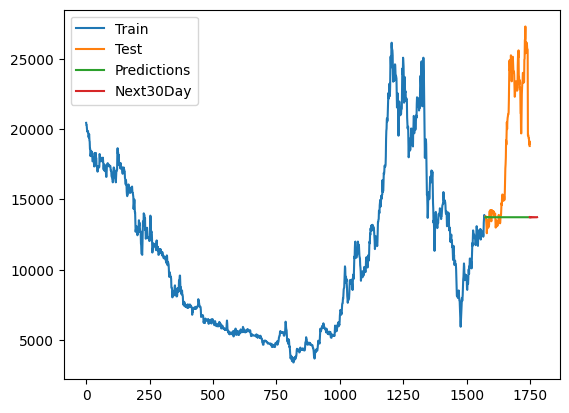

In [ ]:
# 6.Draw
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Predict30Days'])
plt.title('ELC', fontweight='bold', fontsize=16, pad=20)
plt.show()